## 1\. Correlação entre consumo de energia elétrica e temperatura

Vou correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

<ipython-input-3-98fa4fa7de4e>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [4]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [5]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


 - Qual é a granularidade da base de dados:


In [6]:
# Verifique a diferença entre as datas para determinar a granularidade
granularidade = energia['referencia'].diff().value_counts().idxmax()
print(f'A granularidade da base de dados é: {granularidade}')


A granularidade da base de dados é: 31 days 00:00:00


 - Qual é o intervalo de tempo (min/max):



In [7]:
# Encontre o intervalo de tempo
min_date = energia['referencia'].min()
max_date = energia['referencia'].max()
print(f'O intervalo de tempo é de {min_date} até {max_date}')


O intervalo de tempo é de 2004-01-01 00:00:00 até 2020-12-01 00:00:00


### **1.2. Temperatura**

In [8]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [9]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

<ipython-input-9-6a19c3c602dc>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [10]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [11]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


 - Qual é a granularidade da base de dados:

In [12]:
granularidad = temperatura['referencia'].diff().value_counts().idxmax()
print(f'A granularidade da base de dados é: {granularidad}')

A granularidade da base de dados é: 1 days 00:00:00


 - Qual é o intervalo de tempo (min/max):

In [13]:
min_dat = temperatura['referencia'].min()
max_dat = temperatura['referencia'].max()
print(f'O intervalo de tempo é de {min_dat} até {max_dat}')

O intervalo de tempo é de 2018-07-15 00:00:00 até 2020-12-31 00:00:00


## 2\. Processamento

### **2.1. Energia**

In [14]:
energia.set_index('referencia', inplace=True)

In [15]:
energia_2019_2020 = energia.loc['2019':'2020']

In [16]:
print(energia_2019_2020.shape)

(24, 3)


### **2.2. Temperatura**

In [17]:
temperatura.set_index('referencia', inplace=True)

In [18]:
temperatura_2019_2020 = temperatura.loc['2019':'2020']

In [19]:
temperatura_2019_2020 = temperatura_2019_2020.dropna()

In [24]:
temperatura_2019_2020['temp-media'] = temperatura_2019_2020[['temp-media-sp',	'temp-media-rj',	'temp-media-mg']].mean(axis=1)

In [25]:
temperatura_2019_2020 = temperatura_2019_2020[['temp-media']].resample('M').mean()


In [26]:
print(temperatura_2019_2020.shape)

(24, 1)


## 3\. Correlação

* Gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

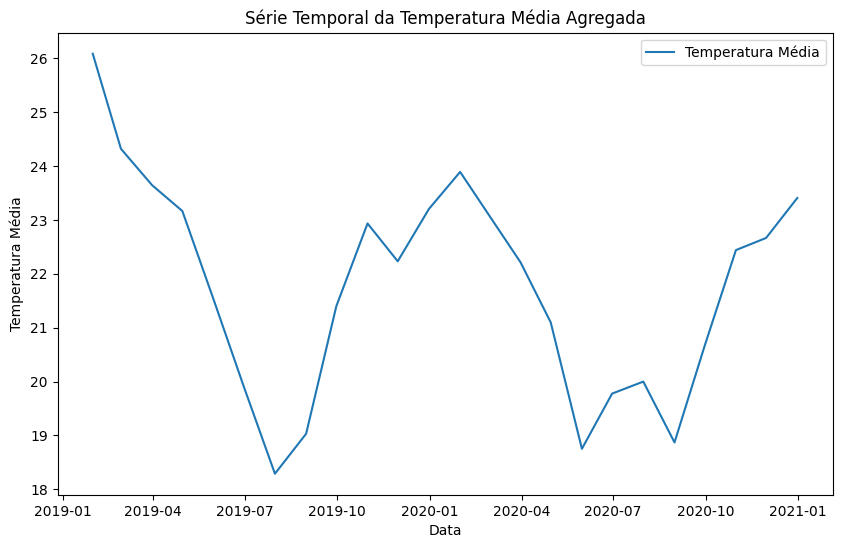

In [38]:
import matplotlib.pyplot as plt

# Criar um gráfico de linha
plt.figure(figsize=(10,6))
plt.plot(temperatura_2019_2020.index, temperatura_2019_2020['temp-media'], label='Temperatura Média')

# Adicionar título e rótulos aos eixos
plt.title('Série Temporal da Temperatura Média Agregada')
plt.xlabel('Data')
plt.ylabel('Temperatura Média')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()


* Gráfico de linha para a série temporal do consumo de energia **residencial**.

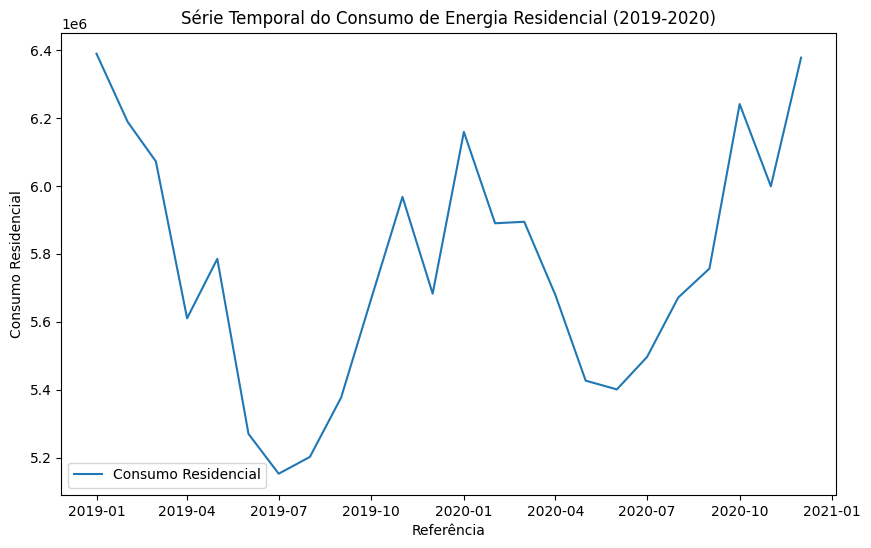

In [36]:
# Filtrar os dados para o período de 2019 a 2020
energia_2019_2020 = energia.loc['2019':'2020']

# Criar o gráfico de linha
plt.figure(figsize=(10,6))
plt.plot(energia_2019_2020.index, energia_2019_2020['residencial'], label='Consumo Residencial')
plt.xlabel('Referência')
plt.ylabel('Consumo Residencial')
plt.title('Série Temporal do Consumo de Energia Residencial (2019-2020)')
plt.legend()
plt.show()



* O método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.



In [37]:
import numpy as np

# Calcular o coeficiente de Pearson
coef_pearson = np.corrcoef(energia_2019_2020['residencial'], temperatura_2019_2020['temp-media'])[0, 1]

print(f'O coeficiente de Pearson entre o consumo de energia elétrica residencial e a temperatura média agregada é {coef_pearson:.2f}')

O coeficiente de Pearson entre o consumo de energia elétrica residencial e a temperatura média agregada é 0.82



*    O coeficiente de Pearson de 0.82 indica uma forte correlação positiva entre a temperatura média agregada e o consumo de energia elétrica residencial. Isso significa que, à medida que a temperatura aumenta, o consumo de energia elétrica residencial também tende a aumentar, e vice-versa.



### **3.2. Consumo comercial**

* Gere um gráfico de linha para a série temporal do consumo de energia **comercial**.

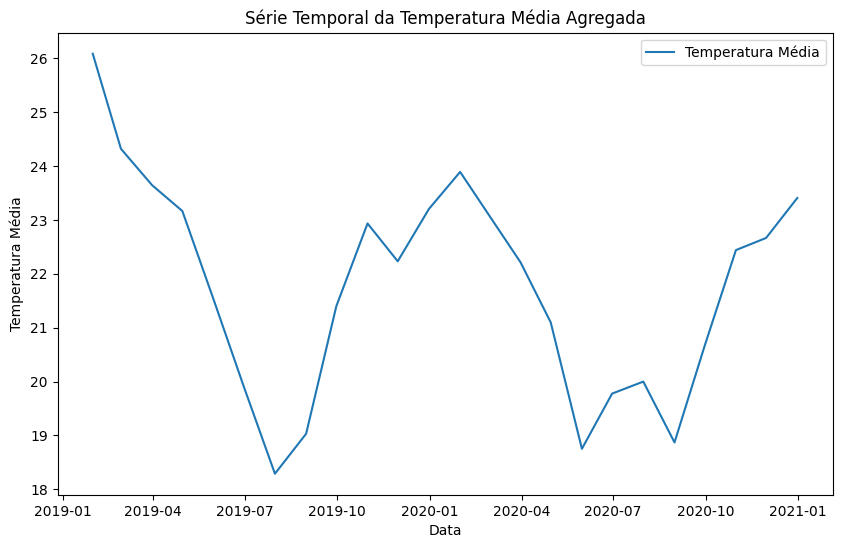

In [39]:
import matplotlib.pyplot as plt

# Criar um gráfico de linha
plt.figure(figsize=(10,6))
plt.plot(temperatura_2019_2020.index, temperatura_2019_2020['temp-media'], label='Temperatura Média')

# Adicionar título e rótulos aos eixos
plt.title('Série Temporal da Temperatura Média Agregada')
plt.xlabel('Data')
plt.ylabel('Temperatura Média')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()


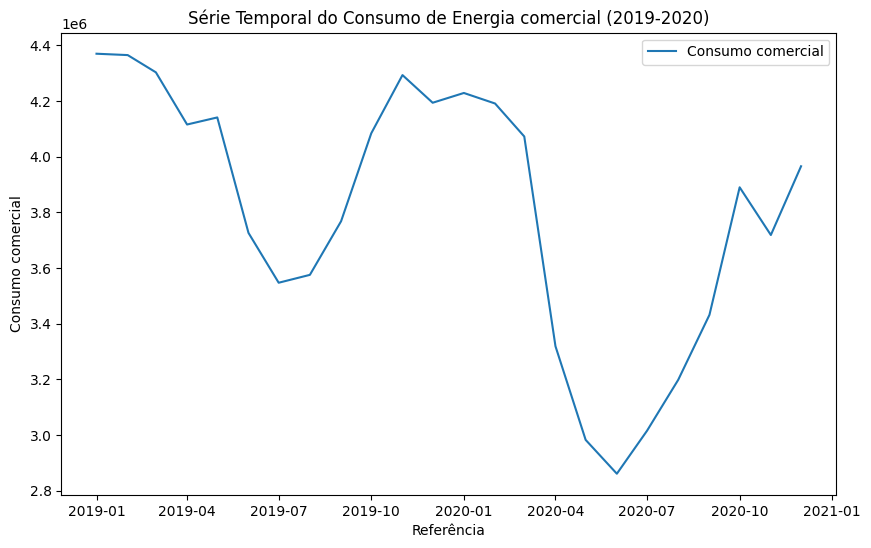

In [40]:
# Filtrar os dados para o período de 2019 a 2020
energia_2019_2020 = energia.loc['2019':'2020']

# Criar o gráfico de linha
plt.figure(figsize=(10,6))
plt.plot(energia_2019_2020.index, energia_2019_2020['comercial'], label='Consumo comercial')
plt.xlabel('Referência')
plt.ylabel('Consumo comercial')
plt.title('Série Temporal do Consumo de Energia comercial (2019-2020)')
plt.legend()
plt.show()

* O método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **Comercial** e a **temperatura** média agregada `temp-media`.

In [42]:
import numpy as np

# Calcular o coeficiente de Pearson
coef_pearson = np.corrcoef(energia_2019_2020['comercial'], temperatura_2019_2020['temp-media'])[0, 1]

print(f'O coeficiente de Pearson entre o consumo de energia elétrica comercial e a temperatura média agregada é {coef_pearson:.2f}')

O coeficiente de Pearson entre o consumo de energia elétrica comercial e a temperatura média agregada é 0.82




* Embora a temperatura possa ser um bom atributo, ela provavelmente não será suficiente por si só para fazer previsões precisas. Outros fatores, como a hora do dia, o dia da semana, a estação do ano, e características específicas dos residências (como isolamento, eficiência energética dos aparelhos, etc.) também podem desempenhar um papel importante no consumo de energia elétrica.



### **3.3. Consumo industrial**

Gere um gráfico de linha para a série temporal do consumo de energia **Industrial**.

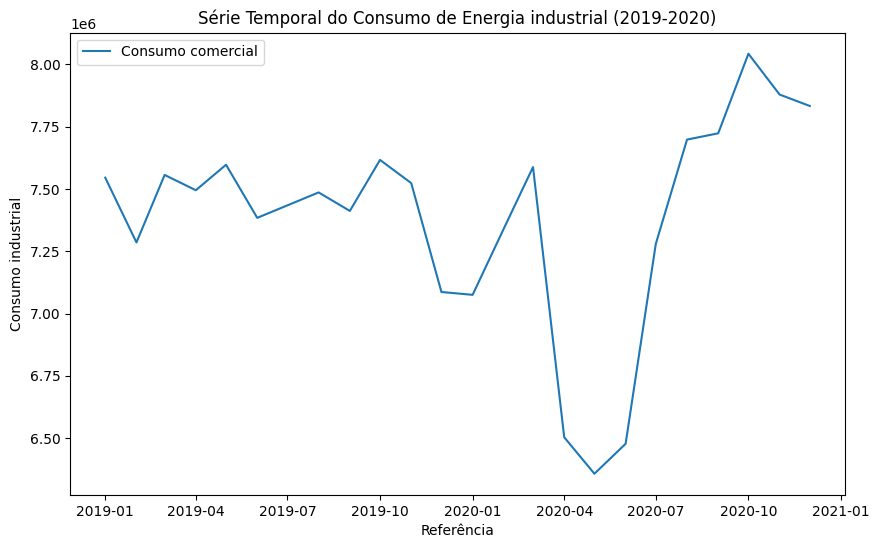

In [43]:
# Filtrar os dados para o período de 2019 a 2020
energia_2019_2020 = energia.loc['2019':'2020']

# Criar o gráfico de linha
plt.figure(figsize=(10,6))
plt.plot(energia_2019_2020.index, energia_2019_2020['industrial'], label='Consumo comercial')
plt.xlabel('Referência')
plt.ylabel('Consumo industrial')
plt.title('Série Temporal do Consumo de Energia industrial (2019-2020)')
plt.legend()
plt.show()

* O método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **Industrial** e a **temperatura** média agregada `temp-media`.

In [44]:
import numpy as np

# Calcular o coeficiente de Pearson
coef_pearson = np.corrcoef(energia_2019_2020['industrial'], temperatura_2019_2020['temp-media'])[0, 1]

print(f'O coeficiente de Pearson entre o consumo de energia elétrica industrial e a temperatura média agregada é {coef_pearson:.2f}')

O coeficiente de Pearson entre o consumo de energia elétrica industrial e a temperatura média agregada é 0.29




*   Isso sugere uma correlação positiva fraca entre essas duas variáveis. Em outras palavras, à medida que a temperatura média aumenta, o consumo de energia elétrica industrial tende a aumentar ligeiramente, mas a relação não é forte.

* No entanto, é importante notar que correlação não implica causalidade. Embora haja uma correlação positiva fraca, isso não significa necessariamente que o aumento da temperatura cause um aumento no consumo de energia elétrica industrial. Pode haver outros fatores em jogo que estão influenciando ambas as variáveis.

*   Além disso, o coeficiente de Pearson só mede relações lineares. Se a relação entre as duas variáveis for não linear, o coeficiente de Pearson pode não capturar adequadamente a força da relação. Portanto, pode ser útil explorar outros métodos de análise ou considerar outros fatores que possam estar influenciando o consumo de energia elétrica industrial.

